In [98]:
import pandas as pd
import geopandas as gpd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [99]:
df_precios = pd.read_csv("Copia de Precios_Metales.xlsx - Sheet1.csv")
df_precios = df_precios[['Fecha', 'Metal', 'Valor', 'Unidad']]
df_precios['Unidad'].unique()
df_precios = df_precios[df_precios['Unidad']!= 'TM']
df_precios.reset_index(inplace = True, drop = True)
df_precios['Metal'].unique()


array(['Cobre', 'Oro', 'Plata', 'Molibdeno'], dtype=object)

In [100]:
df_produccion = pd.read_csv("produccion-de-cobre-por-mina-1960-2018.csv")
df_produccion.dropna(inplace=True)
df_produccion.replace(['-', '0'], np.nan, inplace=True)
for ano in range(1960, 2019):
    ano = str(ano)
    df_produccion[ano] = df_produccion[ano].apply(lambda x: x.replace(',', '') if type(x)==str else x)
    df_produccion[ano] = df_produccion[ano].astype("float")
df_produccion


,Producción Chilena de Cobre de Mina/ Chilean Copper Mine Production,Unidad,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Chuquicamata (1),Miles TM,231.1,249.6,275.8,274.8,288.0,252.7,303.5,276.9,...,574.0,528.4,443.4,355.9,339.0,340.4,308.6,302.0,330.9,320.7
1,Radomiro Tomic (2),Miles TM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,300.7,375.3,470.1,427.8,379.6,327.3,315.7,318.3,318.9,332.7
2,Ministro Hales,Miles TM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,33.5,141.2,238.3,237.0,215.1,195.5
3,Salvador,Miles TM,78.8,72.6,82.4,88.2,76.7,74.1,76.8,78.0,...,65.5,76.2,69.0,62.7,54.3,54.0,48.6,59.8,62.0,60.8
4,Andina,Miles TM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,209.7,188.5,234.4,249.9,236.7,232.4,224.3,193.4,220.0,195.5
5,El Teniente,Miles TM,169.3,158.9,152.0,144.4,163.1,152.4,144.6,181.5,...,404.1,403.6,400.3,417.2,450.4,455.5,471.2,475.3,464.3,465.0
6,Gaby,Miles TM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,148.0,117.1,118.0,133.0,128.2,121.0,125.0,121.7,122.7,107.3
7,Total Codelco,Miles TM,479.2,481.1,510.2,507.4,527.8,479.2,524.9,536.4,...,1702.0,1689.1,1735.2,1646.5,1621.7,1671.8,1731.7,1707.5,1733.9,1677.5
8,Escondida,Miles TM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1103.7,1086.7,817.7,1075.9,1193.7,1165.4,1152.5,1002.0,925.4,1242.7
9,Collahuasi,Miles TM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,535.9,504.0,453.3,282.1,444.5,470.4,455.3,506.5,524.0,559.2


In [101]:
df_produccion = df_produccion[['Producción Chilena de Cobre de Mina/ Chilean Copper Mine Production', 'Unidad', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']]
df_produccion.dropna(inplace=True)
df_produccion.reset_index(drop=True ,inplace=True)
df_produccion

,Producción Chilena de Cobre de Mina/ Chilean Copper Mine Production,Unidad,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Chuquicamata (1),Miles TM,641.9,596.8,601.1,691.8,676.1,634.0,615.0,469.9,574.0,528.4,443.4,355.9,339.0,340.4,308.6,302.0,330.9,320.7
1,Radomiro Tomic (2),Miles TM,260.3,297.1,306.1,291.0,288.8,306.6,281.3,285.4,300.7,375.3,470.1,427.8,379.6,327.3,315.7,318.3,318.9,332.7
2,Salvador,Miles TM,81.2,72.8,80.1,74.9,77.5,80.6,63.9,42.7,65.5,76.2,69.0,62.7,54.3,54.0,48.6,59.8,62.0,60.8
3,Andina,Miles TM,253.3,218.7,235.8,239.9,248.2,236.4,218.4,219.5,209.7,188.5,234.4,249.9,236.7,232.4,224.3,193.4,220.0,195.5
4,El Teniente,Miles TM,355.6,334.3,339.4,435.6,437.4,418.3,404.7,381.2,404.1,403.6,400.3,417.2,450.4,455.5,471.2,475.3,464.3,465.0
5,Total Codelco,Miles TM,1592.3,1519.7,1562.5,1733.2,1728.0,1675.9,1583.3,1466.4,1702.0,1689.1,1735.2,1646.5,1621.7,1671.8,1731.7,1707.5,1733.9,1677.5
6,Escondida,Miles TM,794.1,758.0,994.7,1195.1,1271.5,1255.6,1483.9,1254.0,1103.7,1086.7,817.7,1075.9,1193.7,1165.4,1152.5,1002.0,925.4,1242.7
7,Collahuasi,Miles TM,452.7,433.5,394.7,481.0,427.0,440.0,452.0,464.4,535.9,504.0,453.3,282.1,444.5,470.4,455.3,506.5,524.0,559.2
8,Los Pelambres,Miles TM,373.8,335.5,337.8,362.6,333.8,335.2,300.1,351.2,322.6,398.0,426.1,417.7,419.2,404.6,375.8,367.8,356.3,370.5
9,Anglo American Sur (3),Miles TM,251.6,249.8,277.9,300.6,293.7,294.8,302.1,283.5,276.9,257.7,264.0,416.6,467.3,436.9,437.8,354.2,348.7,422.2


In [102]:
df_precios['Metal'].unique()

array(['Cobre', 'Oro', 'Plata', 'Molibdeno'], dtype=object)

In [103]:
df_precios = df_precios[df_precios["Valor"] != "FERIADO"]
df_precios = df_precios[df_precios["Valor"] != "Feriado"]
df_precios = df_precios[df_precios['Metal'] != 'Molibdeno']

In [104]:
pp2 = df_precios[df_precios['Unidad'] != 'US$/ozt']
pp2['Valor'] = pp2['Valor'].apply(lambda x: x.replace(',', '') if type(x)==str else x)
pp2['Valor'] = pp2['Valor'].astype('float')
pp2

,Fecha,Metal,Valor,Unidad
0,12-09-17,Cobre,299.440,¢US/lb
4,13-09-17,Cobre,296.060,¢US/lb
8,14-09-17,Cobre,291.138,¢US/lb
12,15-09-17,Cobre,292.880,¢US/lb
16,18-09-17,Cobre,294.245,¢US/lb
...,...,...,...,...
3847,22-07-2021,Cobre,426.000,¢US/lb
3851,23-07-2021,Cobre,428.000,¢US/lb
3855,26-07-2021,Cobre,434.542,¢US/lb
3859,27-07-2021,Cobre,440.393,¢US/lb


In [105]:
pp = df_precios[df_precios['Unidad']== 'US$/ozt']
pp['Valor'] = pp['Valor'].apply(lambda x: x.replace(',', '') if type(x)==str else x)
pp['Valor'] = pp['Valor'].astype('float')
pp['Valor'] = pp['Valor'].apply(lambda x: x * (1 / 6))
pp['Unidad'] = '¢US/lb'
pp

,Fecha,Metal,Valor,Unidad
1,12-09-17,Oro,221.041667,¢US/lb
2,12-09-17,Plata,2.958333,¢US/lb
5,13-09-17,Oro,222.041667,¢US/lb
6,13-09-17,Plata,2.985000,¢US/lb
9,14-09-17,Oro,220.500000,¢US/lb
...,...,...,...,...
3857,26-07-2021,Plata,4.227500,¢US/lb
3860,27-07-2021,Oro,299.525000,¢US/lb
3861,27-07-2021,Plata,4.185833,¢US/lb
3864,28-07-2021,Oro,299.883333,¢US/lb


In [106]:
pp_final = pd.concat([pp, pp2])


In [107]:
pp_final["Fecha"] = pp_final["Fecha"].apply(lambda x: x.replace("-17", "-2017"))


In [108]:
pp_final['Fecha'] = pd.to_datetime(pp_final['Fecha'], format='%d-%m-%Y')


In [109]:
pp_final.sort_values(by='Fecha', ignore_index=True, inplace=True)


In [110]:
pp_final["Fecha"].replace("-17", "-2017", inplace=True)
pp_final

,Fecha,Metal,Valor,Unidad
0,2017-08-20,Oro,198.125000,¢US/lb
1,2017-08-20,Plata,2.459167,¢US/lb
2,2017-08-20,Cobre,270.477000,¢US/lb
3,2017-09-12,Oro,221.041667,¢US/lb
4,2017-09-12,Cobre,299.440000,¢US/lb
...,...,...,...,...
2862,2021-07-27,Cobre,440.393000,¢US/lb
2863,2021-07-27,Oro,299.525000,¢US/lb
2864,2021-07-28,Oro,299.883333,¢US/lb
2865,2021-07-28,Plata,4.132500,¢US/lb


In [111]:
def fecha_a_codigo(fecha):
    fecha = str(fecha)
    fecha = fecha.replace('00:00:00', '')
    codigo = fecha.replace('-', '')
    return int(codigo)

In [112]:
pp_final['Codigo'] = pp_final['Fecha'].apply(fecha_a_codigo)
pp_final

,Fecha,Metal,Valor,Unidad,Codigo
0,2017-08-20,Oro,198.125000,¢US/lb,20170820
1,2017-08-20,Plata,2.459167,¢US/lb,20170820
2,2017-08-20,Cobre,270.477000,¢US/lb,20170820
3,2017-09-12,Oro,221.041667,¢US/lb,20170912
4,2017-09-12,Cobre,299.440000,¢US/lb,20170912
...,...,...,...,...,...
2862,2021-07-27,Cobre,440.393000,¢US/lb,20210727
2863,2021-07-27,Oro,299.525000,¢US/lb,20210727
2864,2021-07-28,Oro,299.883333,¢US/lb,20210728
2865,2021-07-28,Plata,4.132500,¢US/lb,20210728


In [123]:
idk = pp_final[pp_final["Metal"] == "Oro"]

In [126]:
idk["Valor"].info

<bound method Series.info of 0       198.125000
3       221.041667
8       222.041667
11      220.500000
12      220.833333
           ...    
2854    299.500000
2856    300.500000
2858    301.358333
2863    299.525000
2864    299.883333
Name: Valor, Length: 956, dtype: float64>

<AxesSubplot:xlabel='Fecha', ylabel='Valor'>

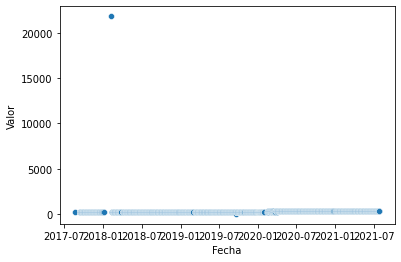

In [125]:
sns.scatterplot(data = idk, x = "Fecha", y = "Valor")

In [114]:
df_2020 = pp_final[pp_final['Fecha'] < '2020-01-01']
df_2020

,Fecha,Metal,Valor,Unidad,Codigo
0,2017-08-20,Oro,198.125000,¢US/lb,20170820
1,2017-08-20,Plata,2.459167,¢US/lb,20170820
2,2017-08-20,Cobre,270.477000,¢US/lb,20170820
3,2017-09-12,Oro,221.041667,¢US/lb,20170912
4,2017-09-12,Cobre,299.440000,¢US/lb,20170912
...,...,...,...,...,...
1657,2019-12-30,Oro,251.916667,¢US/lb,20191230
1658,2019-12-30,Cobre,280.479000,¢US/lb,20191230
1659,2019-12-31,Oro,253.833333,¢US/lb,20191231
1660,2019-12-31,Cobre,279.232000,¢US/lb,20191231


In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
df_2020['Metal'].unique()

array(['Oro', 'Plata', 'Cobre'], dtype=object)

In [117]:
diccionario = {'Oro' : 1  , 'Plata': 2, 'Cobre': 3}
df_2020.replace({'Metal': diccionario}, regex=True, inplace=True)
df_2020 = df_2020[['Codigo', 'Metal', 'Valor']]
df_2020 = df_2020.dropna()
df_2020

,Codigo,Metal,Valor
0,20170820,1,198.125000
1,20170820,2,2.459167
2,20170820,3,270.477000
3,20170912,1,221.041667
4,20170912,3,299.440000
...,...,...,...
1657,20191230,1,251.916667
1658,20191230,3,280.479000
1659,20191231,1,253.833333
1660,20191231,3,279.232000


In [118]:
prueba = df_2020[df_2020['Metal']== 1]
prueba 

,Codigo,Metal,Valor
0,20170820,1,198.125000
3,20170912,1,221.041667
8,20170913,1,222.041667
11,20170914,1,220.500000
12,20170915,1,220.833333
...,...,...,...
1649,20191224,1,248.500000
1652,20191226,1,248.500000
1655,20191227,1,251.766667
1657,20191230,1,251.916667


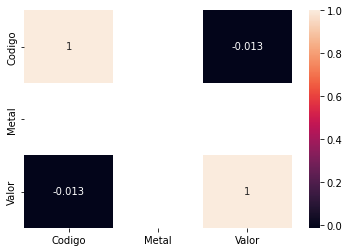

In [119]:
corr_df = prueba.corr(method='pearson')

sns.heatmap(corr_df, annot=True)
plt.show()

In [120]:
predic_2020=LinearRegression()
train,test = train_test_split(df_2020, test_size=0.2 , random_state=42)
y_train = train.Valor
y_test = test.Valor


X_train = train.drop(['Valor'], axis=1)
X_test = test.drop(['Valor'], axis=1)
#acabo de seleccionar mis train
#esta  bueno separe los datos de mi y

predic_2020.fit(X_train, y_train)

LinearRegression()

In [121]:
predic_2020.score(X_train, y_train)

0.009181466634782143

In [122]:
mas_caro = pp_final.groupby("Metal", as_index=False).agg("mean")
mas_caro

,Metal,Valor,Codigo
0,Cobre,3283.823773,2.019240e+07
1,Oro,275.232288,2.019241e+07
2,Plata,3.656849,2.019241e+07


# Preguntas

 1. Mineral más caro 

 2. Año con más produccion

 3. Que mes tiene valor los metales

 4. Como va a ser diciembre 

 5. Como afecta los eventos sociales

# Objetivo 

### Como hubiera sido el 2022 en tema de producción y precios